<a href="https://colab.research.google.com/github/KurtGabrielAnduque/PSG-sa-DATASCI/blob/main/REVIEWER_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

💥 Your Pandas Challenge 💥
1️⃣ Data Cleaning
Fill in missing values for Age using the median age.
Fill in missing values for Embarked with the most common port.
Drop the Cabin column since it has too many missing values.
2️⃣ Data Analysis
Find the percentage of survivors (Survived column: 1 = survived, 0 = not survived).
Find the average fare for each passenger class (Pclass).
Find the most common surname from the Name column.
3️⃣ Advanced Challenge (Boss Level 😈)
Create a new column "FamilySize", which is SibSp + Parch + 1.
Find out if passenger class (Pclass) affected survival rates by calculating survival percentage per class.
Use groupby to determine which gender had a higher survival rate.
💡 Bonus: Create a Seaborn barplot comparing Survival Rate by Gender.

'''

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.Name[(df.Age <= 17) | (df.Age >= 50)]

,Name
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
9,"Nasser, Mrs. Nicholas (Adele Achem)"
10,"Sandstrom, Miss. Marguerite Rut"
11,"Bonnell, Miss. Elizabeth"
...,...
853,"Lines, Miss. Mary Conover"
857,"Daly, Mr. Peter Denis"
869,"Johnson, Master. Harold Theodor"
875,"Najib, Miss. Adele Kiamie ""Jane"""


In [ ]:
#Fill in missing values for Age using the median age.


df.Age.fillna(df['Age'].median(), inplace = True)
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [ ]:
#Fill in missing values for Embarked with the most common port.


df.Embarked.fillna(df['Embarked'].mode(), inplace  = True)
df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
#Drop the cabin column

#sagot
# df.drop(columns = ['Cabin], inplace = True)
df.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
#Find the percentage of survivors (Survived column: 1 = survived, 0 = not survived).

percentage_alive = round(df['Survived'].mean() * 100, 2)
percentage_dead = 100 - percentage_alive

print(percentage_alive)
print(percentage_dead)

38.38
61.62


In [ ]:
# Find the average fare for each passenger class (Pclass).

df.groupby(['Pclass'])['Fare'].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
# Find the most common surname from the Name column.

df['Surname'] = df['Name'].str.split(',').str[0]
df['Surname'].mode()

,Surname
0,Andersson


In [ ]:
df["FamilySize"] = df["SibSp"]+df["Parch"]+1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,1


In [ ]:
#Survival rate per family size

df.groupby(['FamilySize'])['Survived'].mean()*100

,Survived
FamilySize,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [ ]:
#Find out if passenger class (Pclass) affected survival rates by calculating survival percentage per class.

df.groupby(['Pclass'])['Survived'].mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [ ]:
# Use groupby to determine which gender had a higher survival rate.

Gender_rate = df.groupby(['Sex'])['Survived'].mean()*100
Gender_rate = Gender_rate.round(2).astype(str) + '%'


Gender_rate

,Survived
Sex,
female,74.2%
male,18.89%


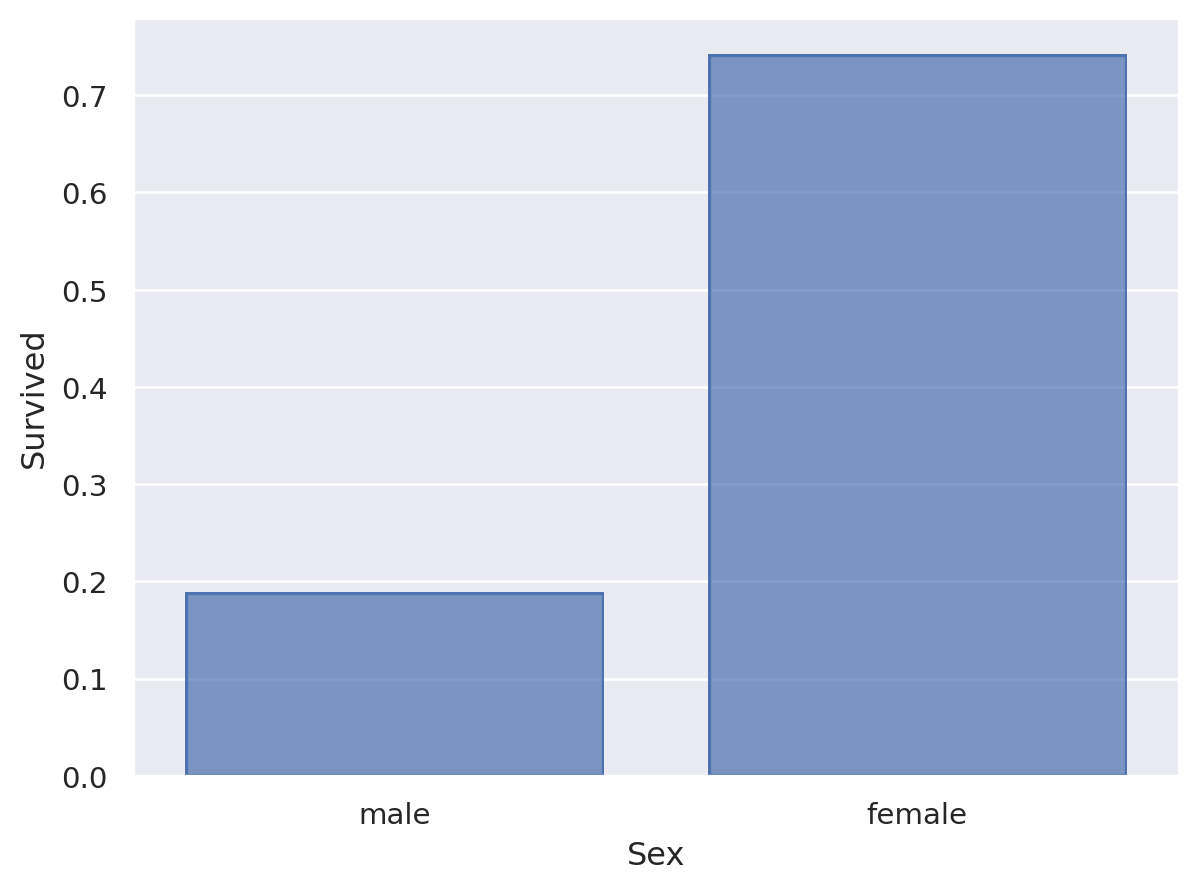

In [ ]:
# 💡 Bonus: Create a Seaborn barplot comparing Survival Rate by Gender.

import seaborn.objects as so






(
 so.Plot(df, x = 'Sex', y = 'Survived')
 .add(so.Bar(), so.Agg())

)